In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,f1_score,mean_squared_error,confusion_matrix,classification_report
import pickle as pk

C:\Users\VICKFURY\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
diabetesdataurl='diabetes.csv'

diabetesdata= pd.read_csv(diabetesdataurl)

In [3]:
diabetesdata[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetesdata[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [4]:
diabetesdata.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

C:\Users\VICKFURY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

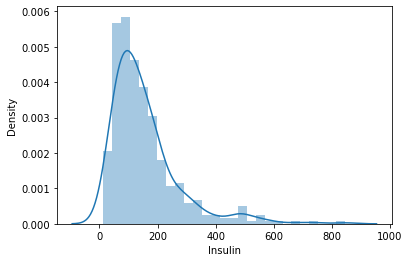

In [5]:
sns.distplot(diabetesdata['Insulin'])

In [6]:
diabetesdata.dropna(inplace=True)

In [7]:
diabetesdata.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

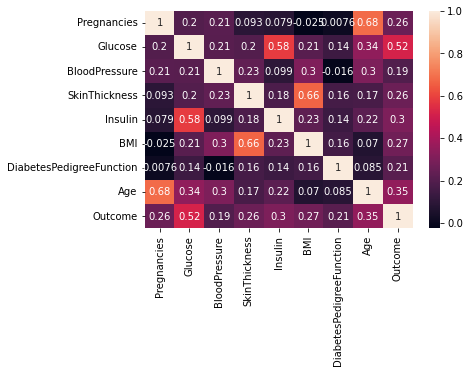

In [8]:
sns.heatmap(diabetesdata.corr(),annot=True)

In [9]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
col=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']


In [10]:
# for i in col:
#     sc=StandardScaler().fit(diabetesdata[[i]])
#     diabetesdata[i]=sc.transform(diabetesdata[[i]])

In [11]:
X=diabetesdata.drop(['Outcome'],axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59
...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63


In [12]:
Y=diabetesdata['Outcome']
Y

3      0
4      1
6      1
8      1
13     1
      ..
753    1
755    1
760    0
763    0
765    0
Name: Outcome, Length: 392, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)


In [14]:
def calculate_meansquarederror(model_pipe, true, pred):
    """Calculate roc auc score. 
    
    Parameters:
    ===========
    model_pipe: sklearn model or pipeline
    X: features
    y: true target
    """
    return mean_squared_error(true,pred)
def display_confusionmatrix(true, pred):
    
    return confusion_matrix(true,pred)
def display_f1score(true, pred):
    return f1_score(true, pred)
def display_classificationreport(true, pred):
    return classification_report(true,pred)

In [15]:

modelpipe1=Pipeline([
      
      ('model', LogisticRegression()),
])
modelpipe2=Pipeline([
     
      ('model',XGBClassifier(learning_rate =0.0001, n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27))

])
modelpipe3=Pipeline([
      
      ('model', svm.SVC(kernel='linear')),
])
modelpipe4=Pipeline([
      
      ('model', RandomForestClassifier(n_estimators=2,criterion="entropy")),
])
modelpipe5=Pipeline([
      
      ('model', KNeighborsClassifier(n_neighbors=1,metric="minkowski",p=2)),
])


modelpipe1.fit(X_train, Y_train)
modelpipe2.fit(X_train, Y_train)
modelpipe3.fit(X_train, Y_train)
modelpipe4.fit(X_train, Y_train)
modelpipe5.fit(X_train, Y_train)

C:\Users\VICKFURY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VICKFURY\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\VICKFURY\anaconda

[19:41:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('model', KNeighborsClassifier(n_neighbors=1))])

In [16]:
trainpred1=modelpipe1.predict(X_train)
trainpred2=modelpipe2.predict(X_train)
trainpred3=modelpipe3.predict(X_train)
trainpred4=modelpipe4.predict(X_train)
trainpred5=modelpipe5.predict(X_train)

In [17]:
print(f"Logistic Regression Mean Squared Error : {calculate_meansquarederror(modelpipe1, Y_train, trainpred1):.4f}")
print(f"XGBoost  Mean Squared Error : {calculate_meansquarederror(modelpipe2, Y_train, trainpred2):.4f}")
print(f"SVM  Mean Squared Error: {calculate_meansquarederror(modelpipe3, Y_train, trainpred3):.4f}")
print(f"Random Forest  Mean Squared Error: {calculate_meansquarederror(modelpipe4, Y_train, trainpred4):.4f}")
print(f"KNN Train Mean Squared Error: {calculate_meansquarederror(modelpipe5, Y_train, trainpred5):.4f}")
#It is always non – negative and values close to zero are better. 

Logistic Regression Mean Squared Error : 0.2268
XGBoost  Mean Squared Error : 0.0863
SVM  Mean Squared Error: 0.2173
Random Forest  Mean Squared Error: 0.1086
KNN Train Mean Squared Error: 0.0000


In [18]:
trainaccuracy=[accuracy_score(Y_train,trainpred1),accuracy_score(Y_train,trainpred2),accuracy_score(Y_train,trainpred3),accuracy_score(Y_train,trainpred4),accuracy_score(Y_train,trainpred5)]
trainaccuracy

[0.7731629392971247,
 0.9137380191693291,
 0.7827476038338658,
 0.8913738019169329,
 1.0]

In [19]:
testpred1=modelpipe1.predict(X_test)
testpred2=modelpipe2.predict(X_test)
testpred3=modelpipe3.predict(X_test)
testpred4=modelpipe4.predict(X_test)
testpred5=modelpipe5.predict(X_test)

In [20]:
print(f"Logistic Regression Mean Squared Error : {calculate_meansquarederror(modelpipe1, Y_test, testpred1):.4f}")
print(f"XGBoost  Mean Squared Error : {calculate_meansquarederror(modelpipe2, Y_test, testpred2):.4f}")
print(f"SVM  Mean Squared Error: {calculate_meansquarederror(modelpipe3, Y_test, testpred3):.4f}")
print(f"Random Forest  Mean Squared Error: {calculate_meansquarederror(modelpipe4, Y_test, testpred4):.4f}")
print(f"KNN Train Mean Squared Error: {calculate_meansquarederror(modelpipe5, Y_test, testpred5):.4f}")

Logistic Regression Mean Squared Error : 0.2405
XGBoost  Mean Squared Error : 0.1772
SVM  Mean Squared Error: 0.1519
Random Forest  Mean Squared Error: 0.2405
KNN Train Mean Squared Error: 0.3291


In [21]:
testaccuracy=[accuracy_score(Y_test,testpred1),accuracy_score(Y_test,testpred2),accuracy_score(Y_test,testpred3),accuracy_score(Y_test,testpred4),accuracy_score(Y_test,testpred5)]
testaccuracy

[0.759493670886076,
 0.8227848101265823,
 0.8481012658227848,
 0.759493670886076,
 0.6708860759493671]

In [22]:
# sample1=[5,116,74,0,0,25.6,0.201,30]
sample1=[6,148,72,35,0,33.6,0.627,50]
sample1=np.array(sample1).reshape(1,-1)
sample1
# resultsample=StandardScaler().fit_transform(sample1.reshape(1,-1))
# resultsample

finalpred=[modelpipe1.predict(sample1),
           modelpipe2.predict(sample1),
           modelpipe3.predict(sample1),
           modelpipe4.predict(sample1),
           modelpipe5.predict(sample1)]
# if finalpred==1:
#     print ('You have diabetes')
# else:
#     print ('No diabetes')
finalpred

C:\Users\VICKFURY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\VICKFURY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\VICKFURY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\VICKFURY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64)]

In [23]:
print (display_confusionmatrix( Y_test, testpred1))
print (display_confusionmatrix( Y_test, testpred2))
print (display_confusionmatrix( Y_test, testpred3))
print (display_confusionmatrix( Y_test, testpred4))
print (display_confusionmatrix( Y_test, testpred5))

# print(f"Logistic Regression Mean Squared Error : {display_confusionmatrix(modelpipe1, Y_test, testpred1):.4f}")
# print(f"XGBoost  Mean Squared Error : {display_confusionmatrix(modelpipe2, Y_test, testpred2):.4f}")
# print(f"SVM  Mean Squared Error: {display_confusionmatrix(modelpipe3, Y_test, testpred3):.4f}")
# print(f"Random Forest  Mean Squared Error: {display_confusionmatrix(modelpipe4, Y_test, testpred4):.4f}")
# print(f"KNN Train Mean Squared Error: {display_confusionmatrix(modelpipe5, Y_test, testpred5):.4f}")

[[44  9]
 [10 16]]
[[47  6]
 [ 8 18]]
[[49  4]
 [ 8 18]]
[[46  7]
 [12 14]]
[[41 12]
 [14 12]]


In [24]:
print (display_classificationreport(Y_test, testpred1))
print (display_classificationreport(Y_test, testpred2))
print (display_classificationreport(Y_test, testpred3))
print (display_classificationreport(Y_test, testpred4))
print (display_classificationreport(Y_test, testpred5))


              precision    recall  f1-score   support

           0       0.81      0.83      0.82        53
           1       0.64      0.62      0.63        26

    accuracy                           0.76        79
   macro avg       0.73      0.72      0.72        79
weighted avg       0.76      0.76      0.76        79

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        53
           1       0.75      0.69      0.72        26

    accuracy                           0.82        79
   macro avg       0.80      0.79      0.80        79
weighted avg       0.82      0.82      0.82        79

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        53
           1       0.82      0.69      0.75        26

    accuracy                           0.85        79
   macro avg       0.84      0.81      0.82        79
weighted avg       0.85      0.85      0.84        79

              preci